,Beginning balance,Market change,Dividends,Interest,Deposits,Withdrawals,Net advisory fees,Ending balance
2014-06-01,0.00,0.00,0.00,0.0,101110.9,0.0,0.0,101110.90
2014-07-01,101110.90,148.55,149.54,0.0,20324.0,0.0,0.0,121732.99
2014-08-01,121732.99,5200.00,0.01,0.0,0.0,0.0,0.0,126933.00
2014-09-01,126933.00,-1376.95,275.68,0.0,12000.0,0.0,0.0,137831.73
2014-10-01,137831.73,3925.00,166.49,0.0,0.0,0.0,0.0,141923.22
...,...,...,...,...,...,...,...,...
2025-06-01,1374143.23,70080.00,1129.59,0.0,15000.0,7000.0,0.0,1456212.76
2025-07-01,1456212.76,26181.86,3423.52,0.0,9000.0,0.0,0.0,1494818.14
2025-08-01,1494818.14,22941.20,532.76,0.0,9000.0,0.0,0.0,1527292.10
2025-09-01,1527292.10,63101.40,945.46,0.0,15000.0,0.0,0.0,1609414.03


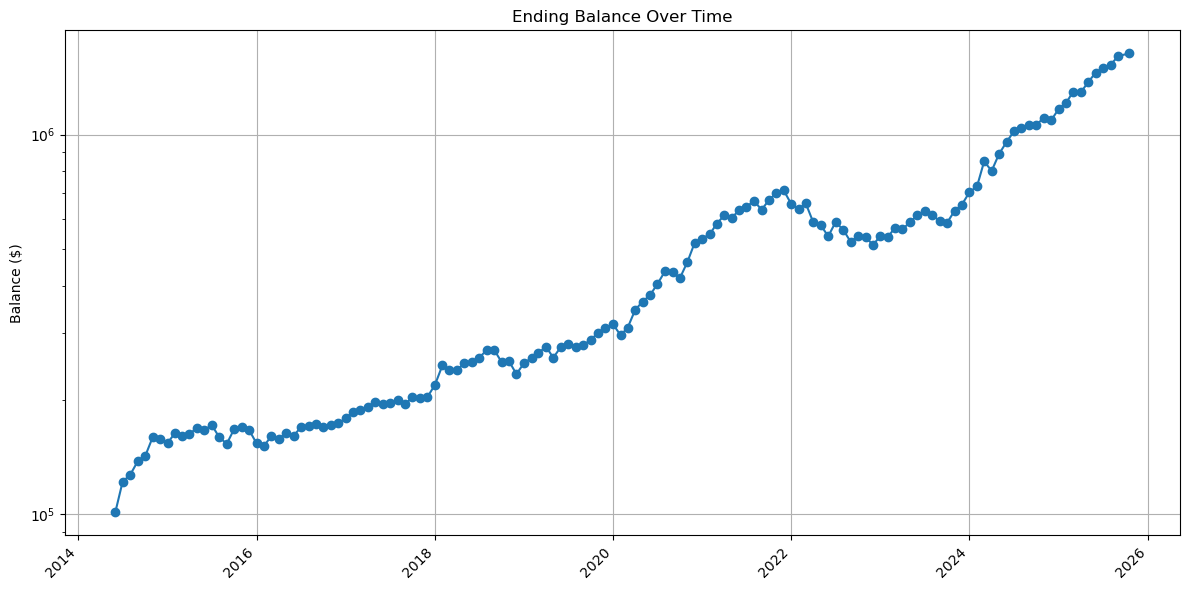

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import re

df = pd.read_csv('/home/tao/Downloads/Investment_income_balance_detail.csv', 
                 skiprows=3,
                 header=0)

total_row_idx = df.index.str.startswith('Total')

# remove 'Total' and all rows after it
if total_row_idx.any():
    first_total_pos = int(total_row_idx.argmax())
    df = df.iloc[:first_total_pos].copy()
else:
    print("No 'Total' row found; nothing removed.")

column_names = df.columns[1:]
# drop the last column
df = df.drop(df.columns[-1:], axis=1)

df.columns = column_names


def parse_date(date_str):
    if '(As of ' in date_str:
        # Extract date after 'As of '
        date_str = date_str.split('As of ')[1].split(')')[0]
        return pd.to_datetime(date_str)
    else:
        # Convert 'MMM YYYY' to first day of month
        try:
            return pd.to_datetime(date_str + '-01')
        except:
            return pd.NaT

# Convert index to datetime
df.index = df.index.map(parse_date)


def clean_to_float(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    # treat parentheses as negative
    if s.startswith('(') and s.endswith(')'):
        s = '-' + s[1:-1]
    # keep only digits, dot, minus and commas (commas removed later)
    s = re.sub(r'[^0-9\.\-,\-]', '', s)
    s = s.replace(',', '')
    if s in ['', '.', '-', '+']:
        return np.nan
    try:
        return float(s)
    except:
        return np.nan

# convert all remaining columns to numeric
for col in df.columns:
    df[col] = df[col].map(clean_to_float)

# Sort index in ascending order
df.sort_index(inplace=True)

display(df)

df.to_csv('/home/tao/Downloads/cleaned_investment_income_balance_detail.csv')

plt.figure(figsize=(12, 6))
df['Ending balance'].plot(kind='line', marker='o')
plt.title('Ending Balance Over Time')
plt.ylabel('Balance ($)')
plt.yscale('log')  # make the y-axis logarithmic
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [5]:
column_sums = df.sum()
print("Sum of each column:")
print("-" * 40)
for column, sum_value in column_sums.items():
    print(f"{column:<20} ${sum_value:,.2f}")

Sum of each column:
----------------------------------------
Beginning balance    $63,540,266.56
Market change        $616,473.48
Dividends            $68,385.84
Interest             $33.83
Deposits             $1,057,717.48
Withdrawals          $118,721.81
Net advisory fees    $0.00
Ending balance       $65,178,740.19
